In [3]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [4]:
bf_filt = pd.read_csv('parsed_bf.csv')

In [33]:
lst = []
for idx, text in enumerate(bf_filt['Observation'].values):
    if 'Baddour' in text:
        lst.append(True)
    else:
        lst.append(False)

In [43]:
len_A = []
len_B = []
len_C = []
for row in bf_filt[bf_filt['Class']=='A']['Observation']:
    len_A.append(len(row.split(' ')))
for row in bf_filt[bf_filt['Class']=='B']['Observation']:
    len_B.append(len(row.split(' ')))
for row in bf_filt[bf_filt['Class']=='C']['Observation']:
    len_C.append(len(row.split(' ')))

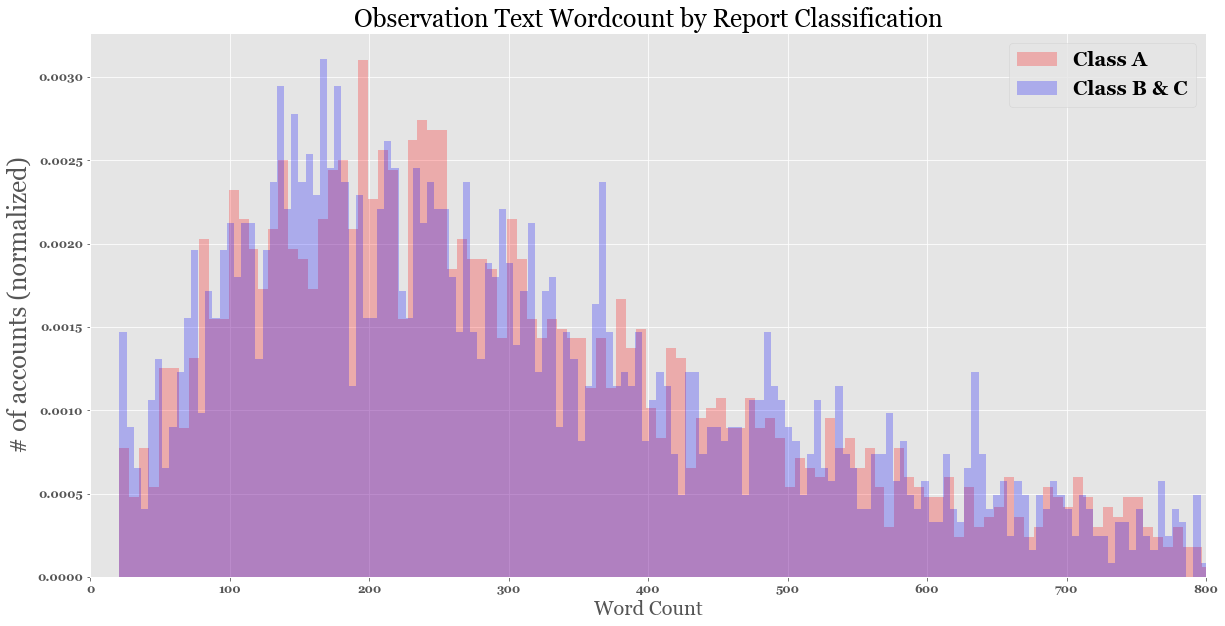

In [44]:
fig, ax = plt.subplots()
div=3
den=True
bins =1000
_ = ax.hist(len_A, bins=bins, color=[1,0,0,0.25], density=den, label = 'Class A')
_ = ax.hist(len_B+len_C, bins=bins, color=[0,0,1,0.25], density=den, label = 'Class B & C')
# _ = ax.hist(len_C, bins=int(len(len_C)/div), color=[0,1,0,0.25], density=True)
_ = ax.set_xlim(0,800)
_ = ax.set_ylabel('# of accounts (normalized)', fontsize=25)
_ = ax.set_xlabel('Word Count', fontsize=20)
_ = ax.set_title('Observation Text Wordcount by Report Classification', fontsize=25)
_ = ax.legend(fontsize=20);
# plt.savefig('BF_observation_length_by_class.png')

### Multinomial Bayes

In [45]:
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from src.naive_bayes import MultinomialNaiveBayes
from sklearn.naive_bayes import MultinomialNB as SKMultinomialNB

In [46]:
## Prepare data
X = bf_filt['Observation'].values
y_raw = bf_filt['Class'].values
y = np.where(y_raw=='A', 'A', 'B')

In [47]:
def my_tokenizer(doc):
    tokenizer = RegexpTokenizer(r'\w+')
    article_tokens = tokenizer.tokenize(doc.lower())
    return article_tokens

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [49]:
X_train_toks = [my_tokenizer(doc) for doc in X_train]
X_test_toks = [my_tokenizer(doc) for doc in X_test]

In [51]:
cv = CountVectorizer(tokenizer=my_tokenizer)
X_train_vec = cv.fit_transform(X_train)
X_test_vec = cv.transform(X_test)
    
my_nb = MultinomialNaiveBayes()
my_nb.fit(X_train_toks, y_train)

print('Test Accuracy:', my_nb.score(X_test_toks, y_test))
my_predictions =  my_nb.predict(X_test_toks)


Test Accuracy: 0.8067510548523207


In [52]:
p_A = []
p_BC = []
A_odds = []

for word in my_nb.vocab:
    p_A.append(my_nb._word_likelihood(word, 'A'))
    p_BC.append(my_nb._word_likelihood(word, 'B'))
    A_odds.append( p_A[-1] / p_BC[-1])

In [53]:
num_words = 50
A_mult = np.array(A_odds)[np.argsort(A_odds)[-num_words:]].round()
BC_mult = np.array(B_odds)[np.argsort(B_odds)[-num_words:]].round()
A_words = my_nb.vocab[np.argsort(A_odds)[-num_words:]]
BC_words = my_nb.vocab[np.argsort(B_odds)[-num_words:]]

In [54]:
cloud_A = []
cloud_B = []
for weight, word, in zip(A_mult, A_words):
    cloud_A.extend([word]*int(weight))
for weight, word, in zip(BC_mult, BC_words):
    cloud_B.extend([word]*int(weight))

(-0.5, 959.5, 959.5, -0.5)

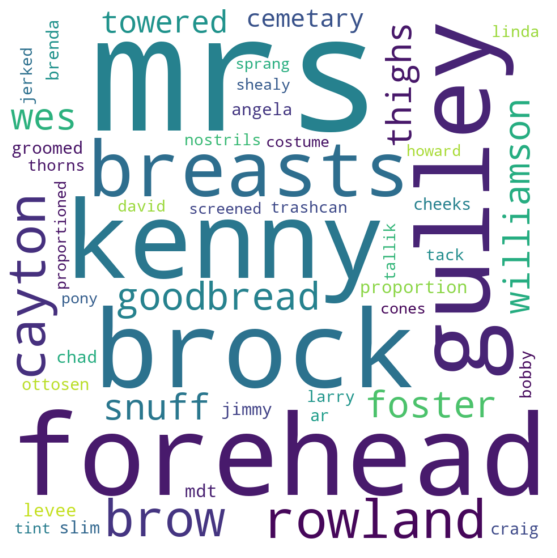

In [55]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

cleaned_textA = ' '.join(cloud_A)

wordcloudA = WordCloud(background_color="white", collocations = False, width=960, height=960, margin=8).generate(cleaned_textA)

fig, ax = plt.subplots()

_ = ax.imshow(wordcloudA, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

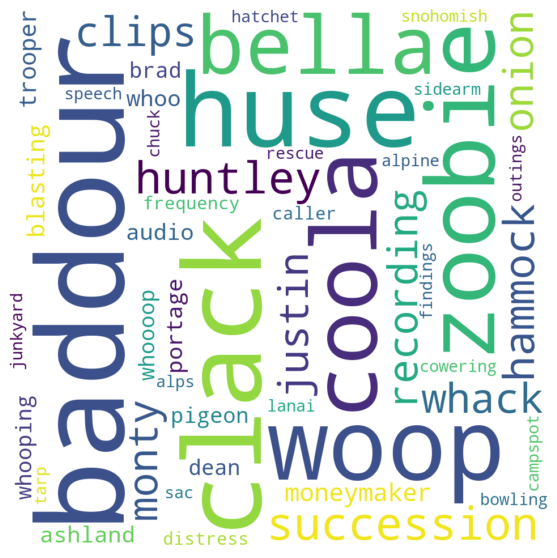

In [57]:
cleaned_textB = ' '.join(cloud_B)
wordcloudBC = WordCloud(background_color="white", collocations = False, width=960, height=960, margin=8).generate(cleaned_textB)

fig, ax = plt.subplots()
_ = ax.imshow(wordcloudBC, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0);